In [76]:
import pandas as pd
%store -r my_data_nan

In [77]:
for key,df in my_data_nan.iteritems():
    if 'instagram' not in df.index:
        print key

instagram_df
hometalk_df
stackexchange_df


In [78]:
insta_data = pd.DataFrame()
for key,df in my_data_nan.iteritems():
    if 'instagram' in df.index:
        new_df = df.loc['instagram'].rename(key.replace('_df','')).to_frame().reset_index().T
        new_df.columns = new_df.loc['year_month']
        new_df = new_df.drop(['year_month']) # (1,18)
        insta_data = insta_data.append(new_df)


In [79]:
insta_data.isnull().sum()

year_month
2016-10    166
2016-11    171
2016-12    154
2017-01    133
2017-02    121
2017-03    127
2017-04    121
2017-05     99
2017-06    112
2017-07    103
2017-08    123
2017-09    134
2017-10     74
2017-11     78
2017-12     78
2018-01     88
2018-02     73
2018-03     59
dtype: int64

In [80]:
insta_data = insta_data.dropna(how='any')  

In [81]:
insta_data

year_month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
gofundme,0.000599071,0.000194421,0.000292219,0.000950638,0.00138511,0.000735936,0.00141331,0.00099772,0.000785853,0.000782335,0.00180676,0.00207118,0.00219871,0.00139276,0.000994102,0.00130307,0.00291794,0.00519005
steampowered,0.00024605,0.000228745,0.000407486,0.000358427,0.00041559,0.000361329,0.000363199,0.000382626,0.000458776,0.000369026,0.000383344,0.000339125,0.000798127,0.000772089,0.000767968,0.000693467,0.000575841,0.000771772
github,0.000657238,0.000815193,0.000846978,0.000999957,0.00110511,0.000996281,0.00122213,0.00134339,0.000988457,0.00115456,0.00124873,0.00120074,0.0015739,0.00197462,0.00176197,0.001587,0.00173391,0.0102281
indeed,0.00542197,0.00516286,0.0047682,0.00488754,0.00477748,0.00491224,0.00614768,0.00759069,0.00603835,0.00609957,0.00442336,0.0045679,0.00594671,0.00660981,0.00794479,0.00768986,0.00778868,0.00539687
jezebel,6.94616e-05,0.00036031,0.00022152,0.000700387,0.000368347,0.000685504,0.00151557,0.000969863,0.00100299,0.000328951,0.00140886,0.00220615,0.000717086,0.000358048,0.000997628,0.000959296,0.00214439,0.00125763
hulu,0.0034438,0.00423069,0.00717459,0.00740058,0.00870752,0.00841049,0.00865946,0.00736434,0.00765577,0.00679925,0.00672415,0.00477512,0.00682708,0.00859154,0.00737059,0.00879553,0.00713537,0.00726956
live,0.00713021,0.00758479,0.00779313,0.00771244,0.00944977,0.00778876,0.00785439,0.00810876,0.00849676,0.00888373,0.0087735,0.00913828,0.00969848,0.0102159,0.0115566,0.0123988,0.0123638,0.0129593
blackboard,0.00682298,0.00530473,0.00355254,0.00581636,0.00477847,0.00398296,0.00713871,0.00925999,0.00456545,0.00592528,0.00241214,0.00588057,0.00712305,0.00847571,0.0113572,0.00644352,0.00708574,0.0091583
nytimes,0.000237143,0.000248706,0.000273268,0.000287483,0.00028579,0.00037223,0.000556083,0.000431231,0.000530201,0.000466386,0.000404528,0.000458435,0.000440938,0.000445932,0.000575711,0.000623177,0.000590214,0.000843369
capitalone,0.00759786,0.00754876,0.00852904,0.00466247,0.00714905,0.0100555,0.00368827,0.00397884,0.00850796,0.00402662,0.00793573,0.0047725,0.007946,0.0102052,0.00891339,0.00760452,0.00600481,0.00942644


In [82]:
insta_avg_month = pd.DataFrame()
avg = []
for column in insta_data:
    avg.append(insta_data[column].mean()*100)

row = pd.Series(avg,insta_data.columns.values)
insta_avg_month = insta_avg_month.append([row],ignore_index=True)
insta_avg_month = insta_avg_month.transpose().reset_index().rename(index=str,columns={'index':'date',0:'avg_share'})

In [83]:
insta_avg_month

,date,avg_share
0,2016-10,0.442743
1,2016-11,0.416649
2,2016-12,0.461710
3,2017-01,0.508223
4,2017-02,0.775863
5,2017-03,0.648827
6,2017-04,0.567730
7,2017-05,0.588408
8,2017-06,0.611673
9,2017-07,0.618833


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import functions_social as fs

In [85]:
insta_data1 = insta_data*100.0
mb = insta_data1.T.reset_index()

In [86]:
df_long = pd.melt(mb,'year_month', var_name = 'site',value_name ='share' )
df_long['share'] = df_long['share'].astype(np.float)
df_long

,year_month,site,share
0,2016-10,gofundme,0.059907
1,2016-11,gofundme,0.019442
2,2016-12,gofundme,0.029222
3,2017-01,gofundme,0.095064
4,2017-02,gofundme,0.138511
5,2017-03,gofundme,0.073594
6,2017-04,gofundme,0.141331
7,2017-05,gofundme,0.099772
8,2017-06,gofundme,0.078585
9,2017-07,gofundme,0.078234


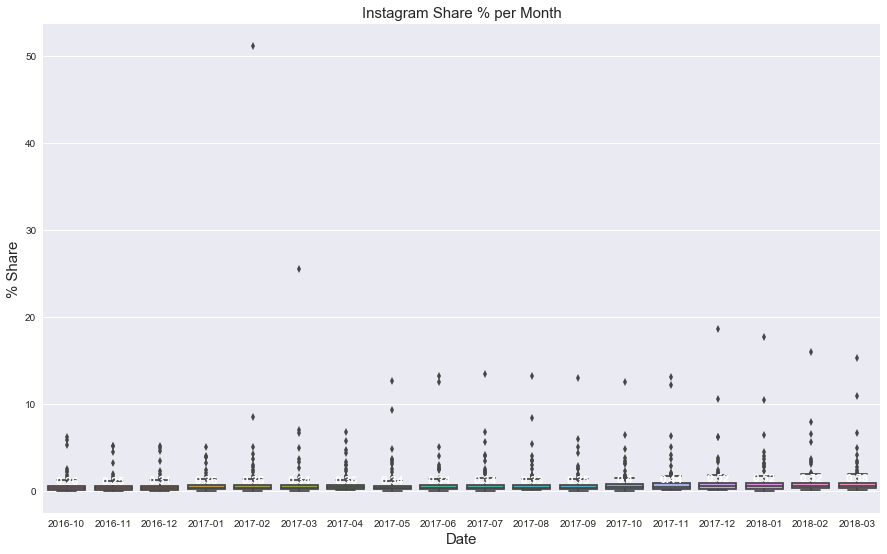

In [87]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='year_month',y='share',data=df_long)
#ax = sns.swarmplot(x='year_month',y='share',data=df_long)
medians = df_long.groupby(['year_month'])['share'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Instagram Share % per Month',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('% Share',fontsize=15)

plt.show()

In [88]:
#perc change from 2016-10 to 2017-10
insta_year_10 = insta_data[['2016-10','2017-10']]
insta_year_10['perc_change'] = (insta_data['2017-10']-insta_data['2016-10'])*100
insta_year_10 = insta_year_10.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

#perc change from 2016-11 to 2017-11
insta_year_11 = insta_data[['2016-11','2017-11']]
insta_year_11['perc_change'] = (insta_data['2017-11']-insta_data['2016-11'])*100
insta_year_11 = insta_year_11.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

insta_year_12 = insta_data[['2016-12','2017-12']]
insta_year_12['perc_change'] = (insta_data['2017-12']-insta_data['2016-12'])*100
insta_year_12 = insta_year_12.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

insta_year_1 = insta_data[['2017-01','2018-01']]
insta_year_1['perc_change'] = (insta_data['2018-01']-insta_data['2017-01'])*100
insta_year_1 = insta_year_1.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

insta_year_2 = insta_data[['2017-02','2018-02']]
insta_year_2['perc_change'] = (insta_data['2018-02']-insta_data['2017-02'])*100
insta_year_2 = insta_year_2.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})

insta_year_3 = insta_data[['2017-03','2018-03']]
insta_year_3['perc_change'] = (insta_data['2018-03']-insta_data['2017-03'])*100
insta_year_3 = insta_year_3.sort_values('perc_change',ascending=False).reset_index().rename(index=str,columns={'index':'website'})


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [89]:
insta_year_10['year_month'] = 'October'
insta_year_10 = insta_year_10.rename(columns={'year_month':'month'})
insta_year_10 = insta_year_10.iloc[:,-2:]


insta_year_11['year_month'] = 'November'
insta_year_11 = insta_year_11.rename(columns={'year_month':'month'})
insta_year_11 = insta_year_11.iloc[:,-2:]

insta_year_12['year_month'] = 'December'
insta_year_12 = insta_year_12.rename(columns={'year_month':'month'})
insta_year_12 = insta_year_12.iloc[:,-2:]

insta_year_1['year_month'] = 'January'
insta_year_1 = insta_year_1.rename(columns={'year_month':'month'})
insta_year_1 = insta_year_1.iloc[:,-2:]

insta_year_2['year_month'] = 'February'
insta_year_2 = insta_year_2.rename(columns={'year_month':'month'})
insta_year_2 = insta_year_2.iloc[:,-2:]

insta_year_3['year_month'] = 'March'
insta_year_3 = insta_year_3.rename(columns={'year_month':'month'})
insta_year_3 = insta_year_3.iloc[:,-2:]

insta_all = insta_year_10.append([insta_year_11,insta_year_12,insta_year_1,insta_year_2,insta_year_3])

insta_all['perc_change'] = insta_all['perc_change'].astype(float)

insta_all = insta_all.reset_index()
insta_all = insta_all[['perc_change','month']]

insta_all

year_month,perc_change,month
0,12.227912,October
1,2.896940,October
2,2.067539,October
3,1.540615,October
4,0.996882,October
5,0.996715,October
6,0.926703,October
7,0.908846,October
8,0.832063,October
9,0.740153,October


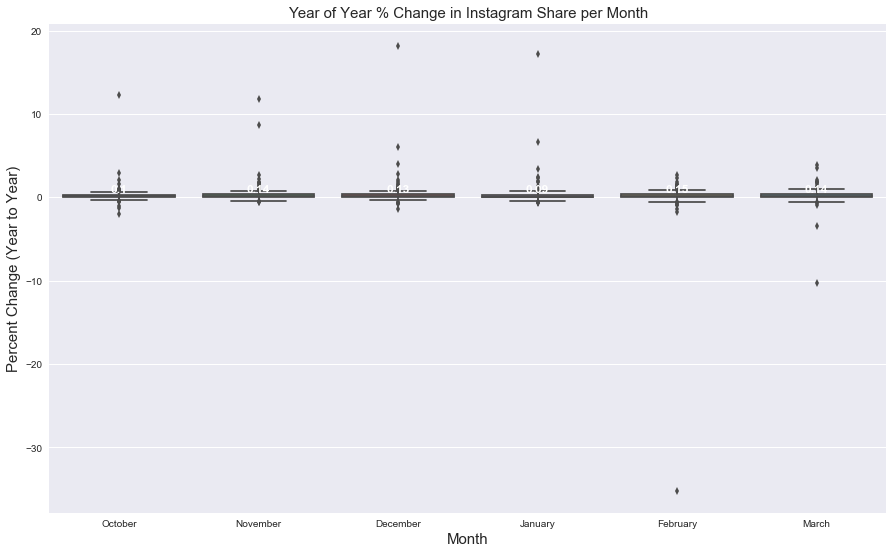

In [90]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='month',y='perc_change',data=insta_all)

medians = insta_all.groupby(['month'],sort=False)['perc_change'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Year of Year % Change in Instagram Share per Month',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Percent Change (Year to Year)',fontsize=15)
plt.show()